##Task:  
For linear regression data used in assignment 01, now implement a neural network. Use various configurations of neural networks. Change parameters to see changes in accuracy. 


#1. Importing Data and libraries

In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression (n_samples = 400, n_features = 1, n_informative = 1, noise= 45, random_state = 121, bias= 0.25)

In [3]:
dataset = pd.DataFrame({'X':X.squeeze(),'y':y})
dataset.sample(5)

,X,y
157,-1.038846,-106.050836
323,-0.145053,-40.642871
259,0.020128,23.857694
64,-0.173749,25.739384
279,2.326822,234.263923


#2. EDA

In [4]:
dataset.dtypes

X    float64
y    float64
dtype: object

In [5]:
dataset.isnull().sum()

X    0
y    0
dtype: int64

In [6]:
dataset.describe()

,X,y
count,400.000000,400.000000
mean,0.021573,3.986830
std,0.957861,103.910800
min,-3.086725,-311.959312
25%,-0.542163,-69.389276
50%,0.038338,3.195375
75%,0.666901,76.785291
max,3.015557,285.910900


In [7]:
import plotly.express as px
fig = px.histogram(dataset, x="X")
fig.show()

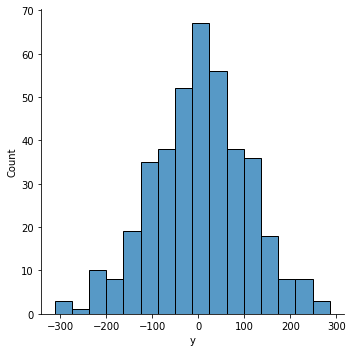

In [8]:
import seaborn as sns
sns.displot(dataset, x = "y")

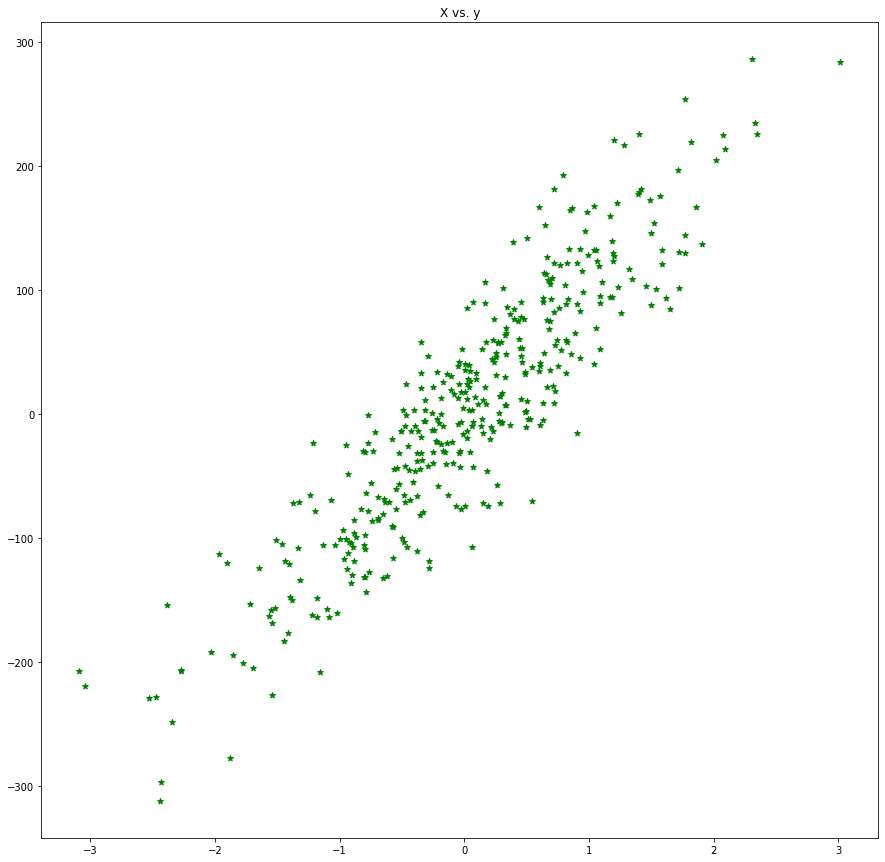

In [9]:
plt.figure(figsize=(15,15))
plt.title('X vs. y')
plt.scatter(X,y,color='green',marker='*')

In [10]:
dataset.corr()

,X,y
X,1.000000,0.908943
y,0.908943,1.000000


#3. Model

##Splitting the data into train and test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 1703)
print("Training size: ", (X_train.shape[0], y_train.shape[0]))
print("Testing size: ", (X_test.shape[0], y_test.shape[0]))

Training size:  (300, 300)
Testing size:  (100, 100)


##3.1 Linear Regression from sklearn

In [12]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(X_train, y_train)
predictions = linear_regression.predict(X_test)
print("score: ",linear_regression.score(X_test, y_test))

score:  0.804678537584997


In [13]:
##Evaluating the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 35.34300337769273
Mean Squared Error: 1822.329728420147
Root Mean Squared Error: 42.688754121198556


## 3.2 Linear model using Keras
define a linear model accepting one input feature *( X )* and producing a single output *('y')* :

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

### 3.2.1 No hidden Layer

In [15]:
model = keras.Sequential([
    # the linear output layer 
    layers.Dense(units=1, input_shape=[1])
])
model.compile(loss='mae',optimizer='rmsprop', metrics=[keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 83.2741 - root_mean_squared_error: 105.5030
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 83.2645 - root_mean_squared_error: 105.4911
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 83.2568 - root_mean_squared_error: 105.4809
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 83.2495 - root_mean_squared_error: 105.4716
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 83.2420 - root_mean_squared_error: 105.4624
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 83.2349 - root_mean_squared_error: 105.4535
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 83.2278 - root_mean_squared_error: 105.4447
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 83.2208 - root_mean_squared_error: 105.4356
Epoch 9/500
10/10 [==============================] - 0s 2ms/step

### 3.2.2 Trying without any activation function

In [16]:
model_none = keras.Sequential([
  # the hidden ReLU layers
   layers.Dense(64, activation=None),
    # the linear output layer 
    layers.Dense(units=1, input_shape=[1])
])
model_none.compile(loss='mae',optimizer='rmsprop', metrics=[keras.metrics.RootMeanSquaredError()])
history_none = model_none.fit(X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 83.7591 - root_mean_squared_error: 106.1203
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 83.5811 - root_mean_squared_error: 105.8938
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 83.4355 - root_mean_squared_error: 105.7089
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 83.2908 - root_mean_squared_error: 105.5284
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 83.1486 - root_mean_squared_error: 105.3485
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 82.9997 - root_mean_squared_error: 105.1619
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 82.8420 - root_mean_squared_error: 104.9612
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 82.6834 - root_mean_squared_error: 104.7586
Epoch 9/500
10/10 [==============================] - 0s 2ms/step

### 3.2.3 Lets now try with ReLu as activation function

In [17]:
model_relu = keras.Sequential([
  # the hidden ReLU layers
   layers.Dense(64, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1, input_shape=[1])
])
model_relu.compile(loss='mae',optimizer='rmsprop', metrics=[keras.metrics.RootMeanSquaredError()])
history_relu = model_relu.fit(X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 83.7300 - root_mean_squared_error: 106.1032
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 83.5875 - root_mean_squared_error: 105.9367
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 83.4752 - root_mean_squared_error: 105.8019
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 83.3693 - root_mean_squared_error: 105.6772
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 83.2675 - root_mean_squared_error: 105.5550
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 83.1678 - root_mean_squared_error: 105.4335
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 83.0671 - root_mean_squared_error: 105.3155
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 82.9655 - root_mean_squared_error: 105.1954
Epoch 9/500
10/10 [==============================] - 0s 2ms/step

###3.2.4 Trying sigmoid activation function

In [18]:
model_sigmoid = keras.Sequential([
  # the hidden sigmoid layer
    layers.Dense(64, activation='sigmoid'),
    # the linear output layer 
    layers.Dense(units=1, input_shape=[1])
])
model_sigmoid.compile(loss='mae',optimizer='rmsprop', metrics=[keras.metrics.RootMeanSquaredError()])
history_sigmoid = model_sigmoid.fit(X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 83.6962 - root_mean_squared_error: 106.0667
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 83.6576 - root_mean_squared_error: 106.0218
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 83.6259 - root_mean_squared_error: 105.9842
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 83.5950 - root_mean_squared_error: 105.9499
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 83.5625 - root_mean_squared_error: 105.9130
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 83.5318 - root_mean_squared_error: 105.8800
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 83.5028 - root_mean_squared_error: 105.8436
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 83.4725 - root_mean_squared_error: 105.8113
Epoch 9/500
10/10 [==============================] - 0s 2ms/step

###3.2.5 Using TanH as activation function

In [19]:
model_tanh = keras.Sequential([
  # the hidden sigmoid layer
    layers.Dense(64, activation='tanh'),
    # the linear output layer 
    layers.Dense(units=1, input_shape=[1])
])
model_tanh.compile(loss='mae',optimizer='rmsprop', metrics=[keras.metrics.RootMeanSquaredError()])
history_tanh = model_tanh.fit(X_train, y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 83.9254 - root_mean_squared_error: 106.3332
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 83.7463 - root_mean_squared_error: 106.1076
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 83.5985 - root_mean_squared_error: 105.9234
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 83.4591 - root_mean_squared_error: 105.7508
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 83.3168 - root_mean_squared_error: 105.5699
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 83.1731 - root_mean_squared_error: 105.3931
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 83.0310 - root_mean_squared_error: 105.2185
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 82.8857 - root_mean_squared_error: 105.0372
Epoch 9/500
10/10 [==============================] - 0s 2ms/step

Comparing the NN models

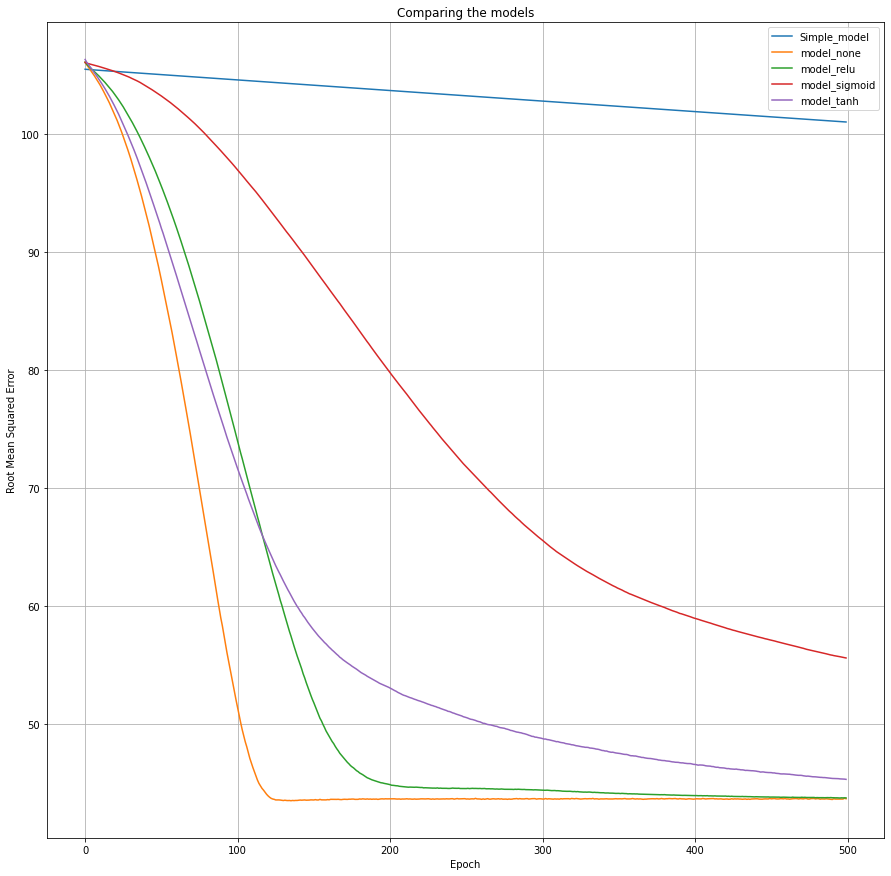

In [20]:
# convert the training history to a dataframe
comparision_df = pd.DataFrame()
comparision_df['Simple_model'] = pd.DataFrame(history.history)['root_mean_squared_error']
comparision_df['model_none'] = pd.DataFrame(history_none.history)['root_mean_squared_error']
comparision_df['model_relu'] = pd.DataFrame(history_relu.history)['root_mean_squared_error']
comparision_df['model_sigmoid'] = pd.DataFrame(history_sigmoid.history)['root_mean_squared_error']
comparision_df['model_tanh'] = pd.DataFrame(history_tanh.history)['root_mean_squared_error']

plt.figure(figsize=(15,15))
for col in comparision_df.columns:
  plt.plot(comparision_df[col], label=col)
  plt.title("Comparing the models")
  plt.xlabel('Epoch')
  plt.ylabel('Root Mean Squared Error')
  plt.legend()
  plt.grid(True)

#4. Predictions

In [21]:
#Linear regression
linear_sklearn_pred = linear_regression.predict(X_test)
##NN
simple_model_pred = model.predict(X_test)
model_none_pred = model_none.predict(X_test)
model_relu_pred = model_relu.predict(X_test)
model_sigmoid_pred = model_sigmoid.predict(X_test)
model_tanh_pred = model_tanh.predict(X_test)

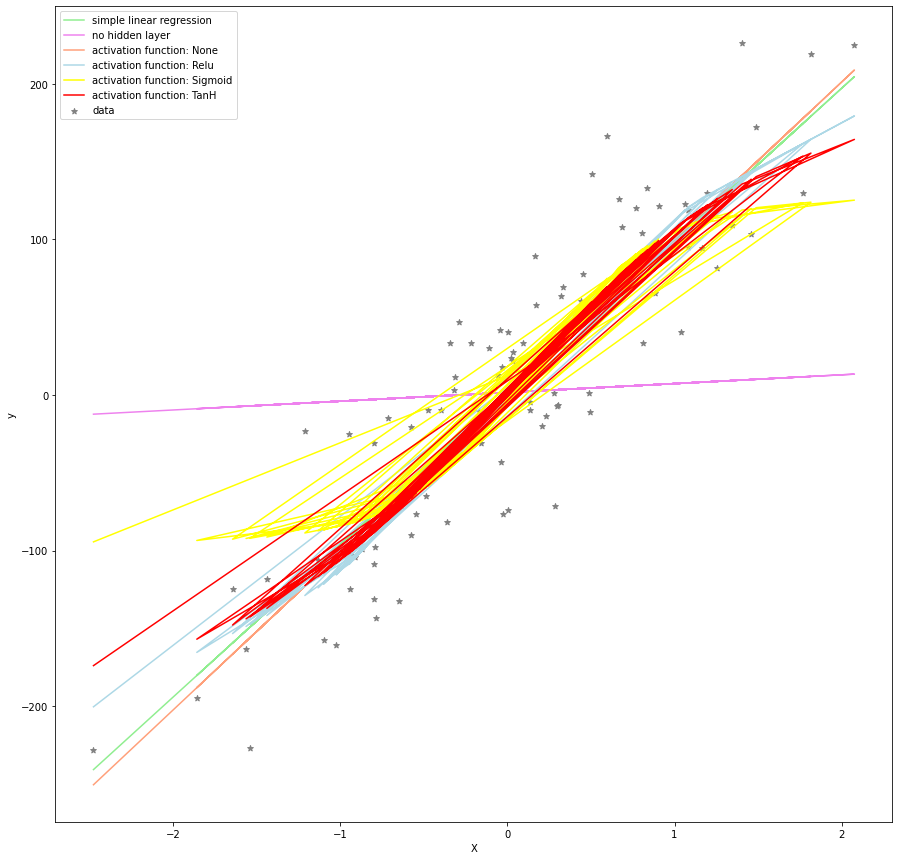

In [22]:
plt.figure(figsize=(15,15))
plt.scatter(X_test, y_test,color='grey',marker='*', label = "data")
plt.plot(X_test, linear_sklearn_pred, color = "lightgreen", label = "simple linear regression")
plt.plot(X_test, simple_model_pred, color = "violet", label = "no hidden layer")
plt.plot(X_test, model_none_pred, color = "lightsalmon", label = "activation function: None")
plt.plot(X_test, model_relu_pred, color = "lightblue", label = "activation function: Relu")
plt.plot(X_test, model_sigmoid_pred, color = "yellow", label = "activation function: Sigmoid")
plt.plot(X_test, model_tanh_pred, color = "red", label = "activation function: TanH")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()

#5 Form for collecting the user Input

In [23]:
%%html
<marquee style='width: 80%; color: purple;'><b>Enter X value in the form below to get the y value!!</b></marquee>

In [24]:
#@title Determing y using X
#@title User Input
X_input =  0.5#@param {type:"number"}

##Checking output

In [25]:
X_t = np.array([[X_input]])
linear_sklearn_t = linear_regression.predict(X_t)
simple_model_t = model.predict(X_t)
none_t = model_none.predict(X_t)
relu_t = model_relu.predict(X_t)
sigmoid_t = model_sigmoid.predict(X_t)
tanh_t = model_tanh.predict(X_t)

print("The output y of the simple linear regression model developed: ", linear_sklearn_t[0])
print("The output y of the simple neural network model developed: ", simple_model_t[0])
print("The output y of the neural network model with 'activation function: None' developed: ", none_t[0])
print("The output y of the neural network model with 'activation function: Relu' developed: ", relu_t[0])
print("The output y of the neural network model with 'activation function: Sigmoid' developed: ", sigmoid_t[0])
print("The output y of the neural network model with 'activation function: TanH' developed: ", tanh_t[0])

The output y of the simple linear regression model developed:  50.447785591719665
The output y of the simple neural network model developed:  [4.5215883]
The output y of the neural network model with 'activation function: None' developed:  [49.84604]
The output y of the neural network model with 'activation function: Relu' developed:  [56.64514]
The output y of the neural network model with 'activation function: Sigmoid' developed:  [64.231804]
The output y of the neural network model with 'activation function: TanH' developed:  [59.364815]
